<a href="https://colab.research.google.com/github/pedroquispe/proyecto-ayacucho/blob/main/Proyecto_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import folium

from folium.plugins import MarkerCluster
import json
from folium.plugins import Search

In [3]:
#Leemos la base de datos con pandas
df = pd.read_csv('bd_ayacucho.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,Fecha,Evento,Tipo,Descripción,Región,Provincia,Distrito,Muertos,Latitud,Longitud,Url_imagen,Url_externo
0,1,17 de mayo de 1980,Atentado de Chuschi,Atentado,El grupo de Sendero Luminoso ingresaron a punt...,Ayacucho,Cangallo,Chuschi,0,-13.583333,-74.350000,https://trome.com/resizer/nP4Jt50Hb67AuiULSD9O...,https://trome.com/actualidad/politica/sendero-...
1,2,19 de julio de 1980,Robo de armas,Robo,"Asaltan la mina Benito Melgarejo, en Ayacucho ...",Ayacucho,NaN,NaN,0,-13.163056,-74.224444,NaN,NaN
2,3,24 de diciembre de 1980,Asesinato en el fundo San Agustín de Ayzarca,Asesinato,Senderistas torturan y asesinan al propietario...,Ayacucho,Vilcashuamán,Vilcashuamán,1,-13.646000,-73.866694,NaN,NaN
3,4,22 de enero de 1981,Asesinato de Mitma Reyes,Asesinato,"Según las versiones policiales, se produce un ...",Ayacucho,Cangallo,Cangallo,1,-13.608556,-74.154500,NaN,NaN
4,5,11 de octubre de 1981,Ataque a puesto policial en El Tambo,Ataque,Cincuenta senderistas asaltaron el puesto poli...,Ayacucho,La Mar,El Tambo,6,-12.948170,-74.020660,https://s3.amazonaws.com/s3.timetoast.com/publ...,NaN


In [4]:
df['Evento']

0                                 Atentado de Chuschi
1                                       Robo de armas
2        Asesinato en el fundo San Agustín de Ayzarca
3                            Asesinato de Mitma Reyes
4                Ataque a puesto policial en El Tambo
5                      Asalto a la Cárcel de Ayacucho
6     Dinamitan la Municipalidad de San Juan Bautista
7                     Asalto a la hacienda Allpachaca
8                     Asalto a la hacienda Illicancha
9               Ataque al puesto de la Guardia Civil 
10                                Asesinato en Huanta
11    Toma del colegio Nuestra Señora de las Mercedes
12    Asesinato de un teniente alcalde acciopopulista
13                Explosivos en la ciudad de Ayacucho
14                             Masacre de Lucanamarca
15                          Asesinato en Canchacancha
16                              Batalla en Sacsamarca
17                                Asesinato en Cabana
18                          

In [5]:
df['Latitud']

0    -13.583333
1    -13.163056
2    -13.646000
3    -13.608556
4    -12.948170
5    -13.166667
6    -13.165886
7    -13.139861
8    -12.928661
9    -13.653056
10   -12.935667
11   -13.157826
12   -13.160858
13   -13.160361
14   -13.843556
15   -13.605833
16   -13.942811
17   -14.288611
18   -14.114582
19   -12.752358
20   -13.532780
21   -12.939722
22   -12.939722
23   -13.013638
24   -13.163056
25   -13.160361
26   -13.160278
27   -12.992694
28   -12.992694
29   -13.653098
30   -12.594055
31   -12.766156
32   -13.168456
33   -12.628230
34   -13.207750
Name: Latitud, dtype: float64

In [6]:
# Point a partir de las coordenadas
# df['Latitud'] = pd.to_numeric(df['Latitud'], errors='coerce')
# df['Longitud'] = pd.to_numeric(df['Longitud'], errors='coerce')

# print(df['Latitud'])
# Creamos un GeoDataFrame
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))

# Limpiamos las cadenas de las columnas de coordenadas
df['Longitud'] = df['Longitud'].astype(float)
df['Latitud'] = df['Latitud'].astype(float)

# Crea una columna 'geometry' con objetos Point a partir de las coordenadas
geometry = [Point(xy) for xy in zip(df['Longitud'], df['Latitud'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


# Configura el sistema de coordenadas si es necesario (EPSG:4326 es WGS 84)
gdf.crs = "EPSG:4326"

# Visualiza el GeoDataFrame
print(gdf)

    ID                     Fecha  \
0    1        17 de mayo de 1980   
1    2       19 de julio de 1980   
2    3   24 de diciembre de 1980   
3    4       22 de enero de 1981   
4    5     11 de octubre de 1981   
5    6        3 de marzo de 1982   
6    7       24 de julio de 1982   
7    8       2 de agosto de 1982   
8    9      12 de agosto de 1982   
9   10      22 de agosto de 1982   
10  11   2 de septiembre de 1982   
11  12     20 de octubre de 1982   
12  13        2 de enero de 1983   
13  14        8 de enero de 1983   
14  15        3 de abril de 1983   
15  16        21 de mayo de 1983   
16  17        21 de mayo de 1983   
17  18   10 de noviembre de 1983   
18  19       16 de julio de 1984   
19  20   25 de diciembre de 1984   
20  21        1 de enero de 1985   
21  22      13 de agosto de 1985   
22  23     16 de febrero de 1987   
23  24     17 de febrero de 1987   
24  25        3 de marzo de 1987   
25  26       14 de abril de 1987   
26  27       19 de marzo de 

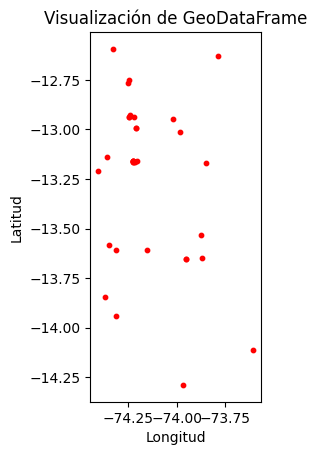

In [7]:
# Visualiza el GeoDataFrame con las coordenadas
gdf.plot(marker='o', color='red', markersize=10)
plt.title('Visualización de GeoDataFrame')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [12]:

# Creamos un mapa en Folium centrado en Ayacucho
map_center = [-13.5588, -74.2239]
m = folium.Map(location=map_center, zoom_start=8, control_scale=True)

# Estilizamos el área de la región Ayacucho en el mapa
bordersStyle = {
    'color': 'black',
    'weight': 2,
    'fillColor': 'purple',
    'fillOpacity': 0.2

}
folium.GeoJson('map.geojson',
               name = "Ayacucho",
               style_function=lambda x:bordersStyle).add_to(m)

# Agrega un título y una descripción al mapa HTML
title_html = "<h1 style='position:absolute; width:920px; text-align:center; margin-left:auto; margin-right:auto; left:0px; right:0px; z-index:10000; background-color:rgba(255,255,255,0.6); font-size: 33px'><b>Principales atentados terroritas en Ayacucho 1980 - 1990</b></h1>"
description_html = "<p style='position:absolute; width:920px; text-align:center; margin-left:auto; margin-right:auto; top:60px; left:0px; right:0px; z-index:10001; background-color:rgba(255,255,255,0.6); font-size: 20px'>Este es un mapa interactivo que presenta los principales atentados terroristas acaecidos en la región de Ayacucho durante los años 1980 a 1990.</p>"
m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(description_html))

#**************************************** Para que ya no se sobreponga, se retira la inicial ****************************************

# Create a MarkerCluster layer for the points
#marker_cluster = MarkerCluster(name='Atentados').add_to(m)

# Add red markers to the map
#for idx, row in gdf.iterrows():
    #popup_html = f"<b>{row['Evento']}</b><br>Latitud: {row['Latitud']}<br>Longitud: {row['Longitud']} <br>Descripcion: {row['Descripción']} <br> <img src='{row['Url_imagen']}' width='250px'><br><a href='{row['Url_externo']}'>Más información</a>"
    #folium.Marker(
        #location=[row['Latitud'], row['Longitud']],
        #popup=folium.Popup(popup_html, max_width="250"), ### max_width = ancho del popup
        #icon=folium.Icon(color='red', icon='fa-person-rifle', prefix='fa') ### FontAwesome
    #).add_to(marker_cluster)

#**************************************** Para que ya no se sobreponga, se retira la inicial ****************************************


In [13]:
#Convertimos el GeoDataFrame a json para hacer el buscador
geojson = gdf.to_json()

#Creamos una columna para las imagenes y los hipervícunlos. Después se agregarán en los pop up
gdf['Imagen'] = gdf['Url_imagen'].apply(lambda x: f'<img src="{x}" alt="Event Image" width="200">')
gdf['Url'] = gdf['Url_externo'].apply(lambda x: f'<a href="{x}" target="_blank">Más información</a>')

#Agregamos marcadores y editamos el contenido de los pop up
icon_color = 'red'
geojson_layer = folium.GeoJson(
    geojson,
    name='Evento',
    style_function=lambda feature: {
        'color': 'icon color',  # Set the color here
        'fillColor': 'icon color',  # Set the fill color if applicable
        'weight': 2,  # Set the border weight
        'opacity': 1,  # Set the opacity
    },
    popup=folium.GeoJsonPopup(
        fields=['Evento', 'Fecha', 'Provincia', 'Distrito', 'Descripción', 'Imagen', 'Url'],
        aliases=['Evento', 'Fecha', 'Provincia', 'Distrito', 'Descripción', '', ''],
        localize=True,
        labels=True,
        style="width: 350px;",
    ),
    tooltip=folium.GeoJsonTooltip(fields=['Evento']),
).add_to(m)



In [14]:
#**************************************** START Satellite Layer ****************************************
# Add Satellite layer to the map
satellite_tile = folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'ArcGis',
    name = 'Satellite - ArcGis',
    overlay = False,
    control = True
    ).add_to(m)
#**************************************** END Satellite Layer ****************************************



In [15]:
#Agregamos el buscador
#Agreamos otra columna para albergar la data de las columnas evento, provincia y distrito para que el usuario pueda buscar con las palabras que se encuentran en esos campos
gdf['Search_Label'] = gdf['Evento'] + ' ' + gdf['Provincia'] + ' ' + gdf['Distrito']

search = Search(
    layer=geojson_layer,
    geom_type='Point',
    placeholder='Buscar por evento',
    collapsed=False,
    search_label='Search_Label',
    weight=10,
    search_zoom=14,
).add_to(m)

# Añadimos el control de capas al mapa
folium.LayerControl().add_to(m)

# Guardamos el mapa interactivo como un archivo HTML
m.save('Mapa_atentados.html')
